# Import libraries

In [174]:
import face_recognition
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import io

## Loading images

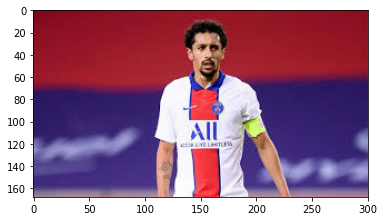

In [88]:
image=face_recognition.load_image_file('.\photos\Marquinhos\Marquinhos face19.jpg')
img=plt.imread(r'./photos/Marquinhos/Marquinhos face19.jpg')
plt.imshow(img)

## Detect face

In [4]:
face_locations =face_recognition.face_locations(image)

In [6]:
trained_data = cv2.CascadeClassifier('frontal-face-data.xml')
greyscale_frame= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [14]:
face_cordinates = trained_data.detectMultiScale(greyscale_frame)
    #x and y is the upper left corner coordinate and w and h are the corresponding width and height of the rectangle
for (x,y,w,h) in face_cordinates:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

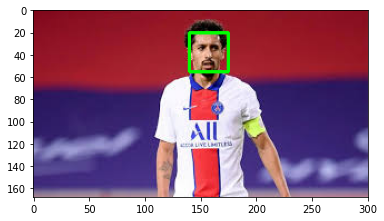

In [15]:
plt.imshow(image)

# Compare faces of images

Here we first compare Marquinhos image to another image of Marquinhos

In [9]:
marqui_face_encoding=face_recognition.face_encodings(image)[0]

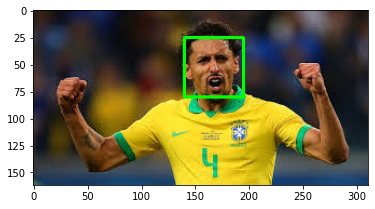

In [103]:
test_image=face_recognition.load_image_file('.\photos\Marquinhos\Marquinhos face22.jpg')
img2=plt.imread(r'./photos/Marquinhos/Marquinhos face22.jpg')

face_locations =face_recognition.face_locations(img2)
trained_data = cv2.CascadeClassifier('frontal-face-data.xml')
greyscale_frame= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
face_cordinates = trained_data.detectMultiScale(greyscale_frame)
for (x,y,w,h) in face_cordinates:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img2)



In [104]:
test_face_encoding=face_recognition.face_encodings(test_image)[0]
res=face_recognition.compare_faces([marqui_face_encoding],test_face_encoding)
if res[0]:
    print('This is Marquinhos')
else : 
    print('This is not Marquinhos')

This is Marquinhos


<font color='green'>IT IS RIGHT !! THIS IS MARQUINHOS</font>

Here we compare an image of Mbappe with Marquinhos and the result is good, it detects the difference of people

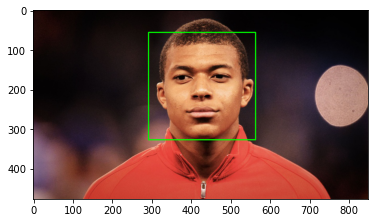

In [171]:

test2_image=face_recognition.load_image_file('.\photos\Mbappe\Mbappe visage2.jpg')
img2=plt.imread(r'./photos/Mbappe\Mbappe visage11.jpg')

face_locations =face_recognition.face_locations(test2_image)
trained_data = cv2.CascadeClassifier('frontal-face-data.xml')
greyscale_frame= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
face_cordinates = trained_data.detectMultiScale(greyscale_frame)
for (x,y,w,h) in face_cordinates:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img2)





In [135]:
test2_face_encoding=face_recognition.face_encodings(test2_image)[0]
res=face_recognition.compare_faces([marqui_face_encoding],test2_face_encoding)
if res[0]:
    print('This is Marquinhos')
else : 
    print('This is not Marquinhos')

This is not Marquinhos


<font color='green'>IT IS RIGHT !! THIS IS NOT MARQUINHOS</font>

## Test if Neymar is Marquinhos 

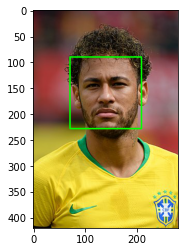

In [197]:

test2_image=face_recognition.load_image_file('./photos/Neymar/Neymar Face1.jpg')
img2=plt.imread(r'./photos/Neymar/Neymar Face1.jpg')

face_locations =face_recognition.face_locations(test2_image)
trained_data = cv2.CascadeClassifier('frontal-face-data.xml')
greyscale_frame= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
face_cordinates = trained_data.detectMultiScale(greyscale_frame)
for (x,y,w,h) in face_cordinates:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img2)





In [167]:
test2_face_encoding=face_recognition.face_encodings(test2_image)[0]
res=face_recognition.compare_faces([marqui_face_encoding],test2_face_encoding)
if res[0]:
    print('This is Marquinhos')
else : 
    print('This is not Marquinhos')

This is not Marquinhos


<font color='green'>IT IS RIGHT !! THIS IS NOT MARQUINHOS</font>

# Crop image to get face and save it

In [146]:
os.mkdir('faces')

In [195]:
joueurs=['Marquinhos','Mbappe','Navas','Neymar','Verratti']
for joueur in joueurs:
    os.mkdir('./faces/'+joueur)

In [196]:

for joueur in joueurs:
    for img in os.listdir('./photos/'+joueur):
        try:
            img2=plt.imread(os.path.join('./photos/'+joueur,img))
            test2_image=face_recognition.load_image_file(os.path.join('./photos/'+joueur,img))

            face_locations =face_recognition.face_locations(test2_image)
            trained_data = cv2.CascadeClassifier('frontal-face-data.xml')
            greyscale_frame= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
            face_cordinates = trained_data.detectMultiScale(greyscale_frame, 1.1, 4)

            """for (x,y,w,h) in face_cordinates:
                cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)
                roi=img2[y:y+h,x:x+w]
                cv2.imwrite('./faces/neymar_face'+str(os.listdir('./photos/Neymar').index(str(img)))+'.jpg',roi)"""
            if len(face_cordinates) ==1: 
                x, y, w, h = face_cordinates[0]
                crop_face = img2[y:y + h, x:x + w]
                if os.path.exists('./faces'):
                      file_path = os.path.join('./faces/'+joueur+'/'+str(os.listdir('./photos/'+joueur).index(str(img)))+'.jpg')
            cv2.imwrite(file_path,crop_face)
        except : 
            pass